In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
architecture = 'cnn'

In [49]:
df = pd.read_csv('results/mnist-{}-test.csv'.format(architecture), header=None)

In [50]:
df

,0,1,2,3,4,5,6
0,NaN,acc_5,acc_6,after_mean_acc,before_mean_acc,loss_5,loss_6
1,0.0,0.9796,0.9774,0.9832,0.983,0.07258905,0.067771524
2,NaN,acc_3,acc_4,after_mean_acc,before_mean_acc,loss_3,loss_4
3,0.0,0.9679,0.977,0.9815,0.9815,0.1068725,0.071642034
4,NaN,acc_5,acc_8,after_mean_acc,before_mean_acc,loss_5,loss_8
5,0.0,0.9796,0.9668,0.979,0.9794,0.07258905,0.11336382
6,NaN,acc_6,acc_8,after_mean_acc,before_mean_acc,loss_6,loss_8
7,0.0,0.9774,0.9668,0.981,0.9812,0.067771524,0.11336382
8,NaN,acc_1,acc_3,after_mean_acc,before_mean_acc,loss_1,loss_3
9,0.0,0.9721,0.9679,0.9793,0.9794,0.08363106,0.1068725


In [51]:
avg_acc = df.iloc[range(1, len(df.index)+1, 2), 4].astype('float32').mean()
print(avg_acc)

0.9809375


In [52]:
val_acc = []
for i in range(8):
    df = pd.read_csv('results/mnist-{}_{}-train.csv'.format(architecture, i+1))
    val_acc.append(df.iloc[-1]['val_acc'])
baseline = np.mean(val_acc)
print(baseline)

0.9730999991297722


In [53]:
results = {}
results_std = {}
for frac in [0, 0.25, 0.5, 0.75, 1]:
    val_acc = []
    for i in range(4):
        df = pd.read_csv('results/vb-mnist-{}-B2-S{:.2f}_{}-train.csv'.format(architecture, frac, i+1))
        val_acc.append(df.iloc[-1]['val_acc'])
    print(frac, val_acc)
    results[frac] = np.mean(val_acc)
    results_std[frac] = np.std(val_acc)

0 [0.9821000099182128, 0.9819999933242798, 0.9819999933242798, 0.9753999710083008]
0.25 [0.9803000092506408, 0.977500021457672, 0.9818999767303468, 0.981599986553192]
0.5 [0.97979998588562, 0.9782999753952026, 0.9800000190734864, 0.9776999950408936]
0.75 [0.9810000061988832, 0.9771000146865844, 0.9800999760627748, 0.9785000085830688]
1 [0.977500021457672, 0.9801999926567078, 0.9729999899864196, 0.9793999791145324]


In [54]:
results

{0: 0.9803749918937683,
 0.25: 0.980324998497963,
 0.5: 0.9789499938488007,
 0.75: 0.9791750013828278,
 1: 0.977524995803833}

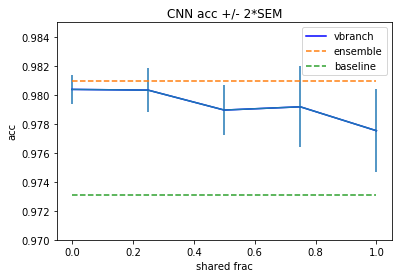

In [55]:
results_list = list(results.items())
results_list.sort()
results_list = np.array(results_list)

plt.plot(results_list[:, 0], results_list[:,1], label='vbranch', color='blue')
trials = 4
error = np.sort(np.array(list(results_std.items())), 0)[:, 1] / np.sqrt(trials)
plt.errorbar(results_list[:, 0], results_list[:,1], error*2)

plt.plot(results_list[:, 0], [avg_acc]*len(results_list), label='ensemble', linestyle='--')
plt.plot(results_list[:, 0], [baseline]*len(results_list), label='baseline', linestyle='--')
# plt.ylim(0.94, 0.96)
plt.ylim(0.97, 0.985)

plt.legend()
plt.xlabel('shared frac')
plt.ylabel('acc')
plt.title('{} acc +/- 2*SEM'.format(architecture.upper()))

plt.savefig('figs/{}-results.png'.format(architecture))
plt.show()